# Scraping StackOverflow

In this project, we will scrap StackOverflow website and list:
- [Languages most mentioned/tagged along with their tag counts](#Goal1)
- [Questions with most votes along with with their attributes (summary, tags, number of votes, answers and views)](#Goal2)

Let's import all the required libraries and packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests # Getting Webpage content
from bs4 import BeautifulSoup as bs # Scraping webpages
import matplotlib.pyplot as plt # Visualization
import matplotlib.style as style # For styling plots
from matplotlib import pyplot as mp # For Saving plots as images

# For displaying plots in jupyter notebook
%matplotlib inline 

style.use('fivethirtyeight') # matplotlib Style 

# Web Scraping Basics

Before starting our project, we need to understand few basics regarding Web Pages and Web Scraping.

When we visit a page, our browser makes a request to a web server. Most of the times, this request is a [GET Request](https://realpython.com/lessons/the-get-request/). Our web browser then receives a bunch of files, typically (HTML, CSS, JavaScript). HTML contains the content, CSS & JavaScript tell browser how to render the webpage. So, we will be mainly interested in the HTML file.

### HTML: 
HTML has elements called [tags](https://www.w3schools.com/html/html_elements.asp), which help in differentiating different parts of a HTML Document. Different types of tags are:
* `html` - all content is inside this tag
* `head` - contains title and other related files
* `body` - contains main cotent to be displayed on the webpage
* `div` - division or area of a page
* `p` - paragraph
* `a` - links

We will get our content inside the body tag and use p and a tags for getting paragraphs and links.

HTML also has [class and id properties](https://www.codecademy.com/articles/classes-vs-ids). These properties give HTML elements names and makes it easier for us to refer to a particular element. <a id='classes'>`Class`</a> can be shared among multiple elements and an element can have moer then one class. Whereas, <a id='id'>`id`</a> needs to be unique for a given element and can be used just once in the document.

### Requests
The requests module in python lets us easily download pages from the web.<br>
We can request contents of a webpage by using `requests.get()`, passing in target link as a parameter. This will give us a [response object](https://realpython.com/python-requests/#the-response). 

### Beautiful Soup
[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library helps us parse contents of the webpage in an easy to use manner. It provides us with some very useful methods and attributes like:
* `find()`, `select_one()` - retuns first occurence of the tag object that matches our filter
* `find_all()`, `select()` - retuns a list of the tag object that matches our filter
* `children` - provides list of direct nested tags of the given paramter/tag

These methods help us in extracting specific portions from the webpage.

***Tip: When Scraping, we try to find common properties shared among target objects. This helps us in extracting all of them in just one or two commands.***

For e.g. We want to scrap points of teams on a league table. In such a scenario, we can go to each element and extract its value. Or else, we can find a common thread (like **same class, same parent + same element type**) between all the points. And then, pass that common thread as an argument to BeautifulSoup. BeautifulSoup will then extract and return the elements to us.

# Plan of Attack (For Goal 1)

Now that we know the basics of Web Scraping, we will move towards our [Goal 1](#Goal1).<br> 
However, before moving forward, it's best practice to make a list of steps to follow:
- [1. Download Webpage from stackoverflow](#1.1)
- [2. Parse the document content into BeautifulSoup](#1.2)
- [3. Extract Top Languages](#1.3)
- [4. Extract their respective Tag Counts](#1.4)
- [5. Put all code together and join the two lists](#1.5)
- [6. Plot Data](#1.6)

### <a id='1.1'>Downloading Tags page  from StackOverflow</a>

We will download the [tags page](https://stackoverflow.com/tags) from [stackoverflow](https://stackoverflow.com/), where it has all the languages listed with their tag count.

In [27]:
# Using requests module for downloading webpage content
response = requests.get('https://stackoverflow.com/tags')

# Getting status of the request
# 200 status code means our request was successful
# 404 status code means that the resource you were looking for was not found
response.status_code

200

### <a id='1.2'>Parsing the document into Beautiful Soup</a>

In [3]:
# Parsing html data using BeautifulSoup
soup = bs(response.content, 'html.parser')

# body 
body = soup.find('body')

# printing the object type of body
type(body)

bs4.element.Tag

### <a id='1.3'>Extract Top Languages</a>

In order to acheive this, we need to understand HTML structure of the document that we have. And then, narrow down to our element of interest.


One way of doing this would be manually searching the webpage (hint: print `body` variable from above).<br>
Second method, is to use the browser's Developr Tools. We will use this second one.

On Chrome, open [tags page](http://stackoverflow.com/tags?tab=popular) and right-click on the language name (shown in top left) and choose **Inspect**.

![Image for Reference](https://github.com/nveenverma/Projects/blob/master/Exploring%20StackOverflow/tags.png)
*<center>Image for Reference</center>*

We can see that the Language name is inside `a` tag, which in turn is inside a lot of div tags. This seems, difficult to extract. Here, the [class](#classes) and [id](#id), we spoke about earlier comes to our rescue. 

If we look more closely in the image above, we can see that the `a` tag has a class of `post-tag`. Using this class along with `a` tag, we can extract all the language links in a list.

In [4]:
lang_tags = body.find_all('a', class_='post-tag')
lang_tags[:5]

[<a class="post-tag" href="/questions/tagged/javascript" rel="tag" title="show questions tagged 'javascript'">javascript</a>,
 <a class="post-tag" href="/questions/tagged/java" rel="tag" title="show questions tagged 'java'">java</a>,
 <a class="post-tag" href="/questions/tagged/c%23" rel="tag" title="show questions tagged 'c#'">c#</a>,
 <a class="post-tag" href="/questions/tagged/php" rel="tag" title="show questions tagged 'php'">php</a>,
 <a class="post-tag" href="/questions/tagged/android" rel="tag" title="show questions tagged 'android'"><img alt="" class="sponsor-tag-img" height="16" src="//i.stack.imgur.com/bk9VA.png" width="18"/>android</a>]

Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract all the language names.

In [5]:
languages = [i.text for i in lang_tags]
languages[:5]

['javascript', 'java', 'c#', 'php', 'android']

### <a id='1.4'>Extract Tag Counts</a>

To extract tag counts, we need to follow a process similar to the above one.

On Chrome, open [tags page](http://stackoverflow.com/tags) and right-click on the tag count, next to the top language (shown in top left) and choose **Inspect**.

![Image for Reference](https://github.com/nveenverma/Projects/blob/master/Exploring%20StackOverflow/tag_count.png)
*<center>Image for Reference</center>*

Here, the tag counts are inside `span` tag, with a class of `item-multiplier-count`. Using this class along with `span` tag, we will extract all the tag count spans in a list.

In [6]:
tag_counts = body.find_all('span', class_='item-multiplier-count')
tag_counts[:5]

[<span class="item-multiplier-count">1823456</span>,
 <span class="item-multiplier-count">1556653</span>,
 <span class="item-multiplier-count">1319628</span>,
 <span class="item-multiplier-count">1289156</span>,
 <span class="item-multiplier-count">1199659</span>]

Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract all the Tag Counts.

In [7]:
no_of_tags = [int(i.text) for i in tag_counts]
no_of_tags[:5]

[1823456, 1556653, 1319628, 1289156, 1199659]

### <a id='1.5'>Put all code together and join the two lists</a>

We will use [Pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to put the two lists together. 

To make a DataFrame, we need to pass both the lists (in dictionary form) as argument to our function.

In [35]:
def get_top_languages(url):
    # Using requests module for downloading webpage content
    response = requests.get(url)

    # Parsing html data using BeautifulSoup
    soup = bs(response.content, 'html.parser')

    # body 
    body = soup.find('body')

    # Extracting Top Langauges
    lang_tags = body.find_all('a', class_='post-tag')
    
    # Error Checking
    if len(lang_tags) != 36:
        print("Error in lang_tags parsing, languages not equal to 36!!!")
        return -1
    
    languages = [i.text for i in lang_tags]

    # Extracting Top Languages' Tag Counts
    tag_counts = body.find_all('span', class_='item-multiplier-count')
    
    # Error Checking
    if len(tag_counts) != 36:
        print("Error in tag_counts parsing, languages not equal to 36!!!")
        return -1
    
    no_of_tags = [int(i.text) for i in tag_counts]

    # Putting the two lists together
    df = pd.DataFrame({'Languages':languages,
                      'Tag Count':no_of_tags})

    return df

### <a id='1.6'>Plot Data</a>

In [36]:
URL1 = 'https://stackoverflow.com/tags'

df = get_top_languages(URL1)
df.head()

,Languages,Tag Count
0,javascript,1823508
1,java,1556695
2,c#,1319670
3,php,1289173
4,android,1199687


Now, we will plot the Top Languages along with their Tag Counts.

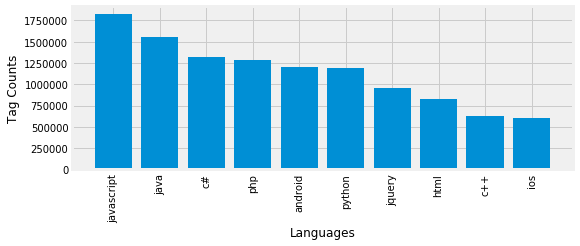

In [9]:
plt.figure(figsize=(8, 3))
plt.bar(height=df['Tag Count'][:10], x=df['Languages'][:10])
plt.xticks(rotation=90)
plt.xlabel('Languages')
plt.ylabel('Tag Counts')
plt.show()

# <a id='Goal2'>Plan of Attack (For Goal 2)</a>

Now that we have collected data using web scraping one time, it won't be difficult the next time.<br> 
In Goal 2 part, we have to list questions with most votes along with their attributes, like:
- Summary
- Tags
- Number of Votes
- Number of Answers
- Number of Views

I would suggest giving it a try on your own, then come here for matching your solution.


*Note: Their can be many ways to scrape data, so you should explore and try to get data in your own way.*

Similar to previous step we will make a list of steps to act upon:

- [1. Download Webpage from stackoverflow](#2.1)
- [2. Parse the document content into BeautifulSoup](#2.2)
- [3. Extract Top Questions](#2.3)
- [4. Extract their respective Summary](#2.4)
- [5. Extract their respective Tags](#2.5)
- [6. Extract their respective no. of votes, answers and views](#2.6)
- [7. Put all code togther and join the lists](#2.7)
- [8. Plot Data](#2.8)

### <a id='2.1'>Downloading Questions page from StackOverflow</a>

We will download the [questions page](https://stackoverflow.com/questions?sort=votes&pagesize=50) from [stackoverflow](https://stackoverflow.com/), where it has all the top voted questions listed.<br>
    
Here, I've appended `?sort=votes&pagesize=50` to the end of the defualt questions URL, to get a list of top 50 questions.

In [10]:
# Using requests module for downloading webpage content
response1 = requests.get('https://stackoverflow.com/questions?sort=votes&pagesize=50')

# Getting status of the request
# 200 status code means our request was successful
# 404 status code means that the resource you were looking for was not found
response1.status_code

200

### <a id='2.2'>Parsing the document into Beautiful Soup</a>

In this section, we will use `select()` and `select_one()` to return BeautifulSoup objects as per our requierment.

While `find` uses tags, `select` uses CSS Selectors in the filter.

For example:

- `p a` — finds all a tags inside of a p tag. 
        soup.select('p a')
- `div.outer-text` — finds all div tags with a class of outer-text.
- `div#first` — finds all div tags with an id of first.
- `body p.outer-text` — finds any p tags with a class of outer-text inside of a body tag.



In [11]:
# Parsing html data using BeautifulSoup
soup1 = bs(response1.content, 'html.parser')

# body 
body1 = soup1.select_one('body')

# printing the object type of body
type(body1)

bs4.element.Tag

### <a id='2.3'>Extract Top Questions</a>

On Chrome, open [questions page](https://stackoverflow.com/questions?sort=votes&pagesize=50) and right-click on the top question and choose **Inspect**.

![Image for Reference](https://github.com/nveenverma/Projects/blob/master/Exploring%20StackOverflow/questions.png)
*<center>Image for Reference</center>*

We can see that the question is inside `a` tag, which  has a class of `question-hyperlink`. 

Taking cue from our previous Goal, we can use this class along with `a` tag, to extract all the question links in a list. However, there are more question hyperlinks in sidebar which will also be extracted in this case. To avoid this scenario, we can combine `a` tag, `question-hyperlink` class with their parent `h3` tag. This will give us exactly 50 Tags.

In [12]:
question_links = body1.select("h3 a.question-hyperlink")
print(len(question_links))
question_links[:5]

50


[<a class="question-hyperlink" href="/questions/11227809/why-is-processing-a-sorted-array-faster-than-processing-an-unsorted-array">Why is processing a sorted array faster than processing an unsorted array?</a>,
 <a class="question-hyperlink" href="/questions/927358/how-do-i-undo-the-most-recent-local-commits-in-git">How do I undo the most recent local commits in Git?</a>,
 <a class="question-hyperlink" href="/questions/2003505/how-do-i-delete-a-git-branch-locally-and-remotely">How do I delete a Git branch locally and remotely?</a>,
 <a class="question-hyperlink" href="/questions/292357/what-is-the-difference-between-git-pull-and-git-fetch">What is the difference between 'git pull' and 'git fetch'?</a>,
 <a class="question-hyperlink" href="/questions/477816/what-is-the-correct-json-content-type">What is the correct JSON content type?</a>]

Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract all the questions.

In [13]:
questions = [i.text for i in question_links]
questions[:5]

['Why is processing a sorted array faster than processing an unsorted array?',
 'How do I undo the most recent local commits in Git?',
 'How do I delete a Git branch locally and remotely?',
 "What is the difference between 'git pull' and 'git fetch'?",
 'What is the correct JSON content type?']

### <a id='2.4'>Extract Summary</a>

On Chrome, open [questions page](https://stackoverflow.com/questions?sort=votes&pagesize=50) and right-click on summary of the top question and choose **Inspect**.

![Image for Reference](https://github.com/nveenverma/Projects/blob/master/Exploring%20StackOverflow/summary.png)
*<center>Image for Reference</center>*

We can see that the question is inside `div` tag, which  has a class of `excerpt`. Using this class along with `div` tag, we can extract all the question links in a list.

In [14]:
summary_divs = body1.select("div.excerpt")
print(len(summary_divs))
print(summary_divs[0])

50
<div class="excerpt">
            Here is a piece of C++ code that shows some very peculiar behavior. For some strange reason, sorting the data miraculously makes the code almost six times faster:

#include &lt;algorithm&gt;
#include &amp;...
        </div>


Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract all the questions. 

Here, we will also use [strip()](https://www.programiz.com/python-programming/methods/string/strip) method on each div's text. This is to remove both leading and trailing unwanted characters from a string.

In [15]:
summaries = [i.text.strip() for i in summary_divs]
summaries[0]

'Here is a piece of C++ code that shows some very peculiar behavior. For some strange reason, sorting the data miraculously makes the code almost six times faster:\n\n#include <algorithm>\n#include &...'

### <a id='2.5'>Extract Tags</a>

On Chrome, open [questions page](https://stackoverflow.com/questions?sort=votes&pagesize=50) and right-click on summary of the top question and choose **Inspect**.

![Image for Reference](https://github.com/nveenverma/Projects/blob/master/Exploring%20StackOverflow/tag_names.png)
*<center>Image for Reference</center>*

Extracting **tags per question** is the most complex task in this post. Here, we cannot find unique class or id for each tag, and there are multiple tags per question that we n
eed to store. 

To extract **tags per question**, we will follow a multi-step process:

1. As shown in figure, individual tags are in a third layer, under two nested div tags. With the upper div tag, only having unique class (`summary`).
    - First, we will extract div with `summary`class.
    - Now notice our target div is third child overall and second `div` child of the above extracted object. Here, we can use `nth-of-type()` method to extract this 2nd `div` child. Usage of this method is very easy and few exmaples can be found [here](https://gist.github.com/yoki/b7f2fcef64c893e307c4c59303ead19a#file-20_search-py). This method will extract the 2nd `div` child directly, without extracting `summary div` first.

In [16]:
tags_divs = body1.select("div.summary > div:nth-of-type(2)")
print(len(tags_divs))
tags_divs[0]

50


<div class="tags t-java t-cçç t-performance t-optimization t-branch-prediction">
<a class="post-tag" href="/questions/tagged/java" rel="tag" title="show questions tagged 'java'">java</a> <a class="post-tag" href="/questions/tagged/c%2b%2b" rel="tag" title="show questions tagged 'c++'">c++</a> <a class="post-tag" href="/questions/tagged/performance" rel="tag" title="show questions tagged 'performance'">performance</a> <a class="post-tag" href="/questions/tagged/optimization" rel="tag" title="show questions tagged 'optimization'">optimization</a> <a class="post-tag" href="/questions/tagged/branch-prediction" rel="tag" title="show questions tagged 'branch-prediction'">branch-prediction</a>
</div>

2. Now, we can use [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40) to extract `a` tags in a list, grouped per question.

In [17]:
a_tags_list = [i.select('a') for i in tags_divs]

# Printing first question's a tags
a_tags_list[0]

[<a class="post-tag" href="/questions/tagged/java" rel="tag" title="show questions tagged 'java'">java</a>,
 <a class="post-tag" href="/questions/tagged/c%2b%2b" rel="tag" title="show questions tagged 'c++'">c++</a>,
 <a class="post-tag" href="/questions/tagged/performance" rel="tag" title="show questions tagged 'performance'">performance</a>,
 <a class="post-tag" href="/questions/tagged/optimization" rel="tag" title="show questions tagged 'optimization'">optimization</a>,
 <a class="post-tag" href="/questions/tagged/branch-prediction" rel="tag" title="show questions tagged 'branch-prediction'">branch-prediction</a>]

3. Now we will run a for loop for going through each question and use [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40) inside the for loop, to extract the tags names.

In [18]:
tags = []

for a_group in a_tags_list:
    tags.append([a.text for a in a_group])

print(len(tags))
tags[:3]

50


[['java', 'c++', 'performance', 'optimization', 'branch-prediction'],
 ['git', 'version-control', 'git-commit', 'undo'],
 ['git', 'git-branch', 'git-remote']]

### <a id='2.6'>Extract Number of votes, answers and views</a>

On Chrome, open [questions page](https://stackoverflow.com/questions?sort=votes&pagesize=50) and inspect vote, answers and views for the topmost answer.

![Image for Reference](https://github.com/nveenverma/Projects/blob/master/Exploring%20StackOverflow/votes.png)
*<center>Image for Reference</center>*

### No. of Votes 
- They can be found by using `span` tag along with `vote-count-post` class and nested `strong` tags

In [19]:
vote_spans = body1.select("span.vote-count-post strong")
print(len(vote_spans))
print(vote_spans[:5])

50
[<strong>23101</strong>, <strong>19683</strong>, <strong>15313</strong>, <strong>11023</strong>, <strong>9715</strong>]


Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract vote counts. 

In [20]:
no_of_votes = [int(i.text) for i in vote_spans]
no_of_votes[:5]

[23101, 19683, 15313, 11023, 9715]

### No. of Answers 
- They can be found by using `div` tag along with `status` class and nested `strong` tags. Here, we don't use `answered-accepted` because its not common among all questions, few of them (whose answer are not accepted) have the class - `answered`. 

In [21]:
answer_divs = body1.select("div.status strong")
print(len(answer_divs))
print(answer_divs[:5])

50
[<strong>22</strong>, <strong>78</strong>, <strong>38</strong>, <strong>40</strong>, <strong>34</strong>]


Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract answer counts. 

In [22]:
no_of_answers = [int(i.text) for i in answer_divs]
no_of_answers[:5]

[22, 78, 38, 40, 34]

### No. of Views 
- For views, we can see two options. One is short form in number of millions and other is full number of views. We will extract the full version. 
- They can be found by using `div` tag along with `supernova` class. Then we need to clean the string and convert it into integer format.

In [23]:
div_views = body1.select("div.supernova")
print(len(div_views))
print(div_views[0])

50
<div class="views supernova" title="1,361,679 views">
    1.4m views
</div>


Using [list comprehension](https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40), we can now extract vote counts. 

In [24]:
no_of_views = [i['title'] for i in div_views]
no_of_views = [i[:-6].replace(',', '') for i in no_of_views]
no_of_views = [int(i) for i in no_of_views]
no_of_views[:5]

[1361679, 7928788, 7000104, 2548877, 2489000]

### <a id='2.7'>Putting all of them together in a dataframe</a>

In [50]:
def get_top_questions(url, question_count):
    # WARNING: Only enter one of these 3 values [15, 30, 50].
    # Since, stackoverflow, doesn't display any other size questions list
    url = url + "?sort=votes&pagesize={}".format(question_count)
    
    ##############################
    # Using requests module for downloading webpage content
    response = requests.get(url)

    ##############################
    # Parsing html data using BeautifulSoup
    soup = bs(response.content, 'html.parser')

    # body 
    body = soup.find('body')

    ##############################
    # Extracting Top Questions
    question_links = body1.select("h3 a.question-hyperlink")
    
    # Error Checking
    if len(question_links) != question_count:
        print("Error in question_links parsing, questions not equal to {}!!!".format(question_count))
        print(len(question_links))
        return -1
    
    questions = [i.text for i in question_links]     # questions list
    
    ########################################
    # Extracting Summary
    summary_divs = body1.select("div.excerpt")
    
    # Error Checking
    if len(summary_divs) != question_count:
        print("Error in summary_divs parsing, summary of questions not equal to {}!!!".format(question_count))
        return -1
    
    summaries = [i.text.strip() for i in summary_divs]  # summaries list
    
    ########################################
    # Extracting Tags
    tags_divs = body1.select("div.summary > div:nth-of-type(2)")
    
    # Error Checking
    if len(tags_divs) != question_count:
        print("Error in tags_divs parsing, tags list of questions not equal to {}!!!".format(question_count))
        return -1
    
    a_tags_list = [i.select('a') for i in tags_divs]  # tag links
    
    tags = []

    for a_group in a_tags_list:
        tags.append([a.text for a in a_group])        # tags list
    
    ########################################
    # Extracting Number of votes
    vote_spans = body1.select("span.vote-count-post strong")
    
    # Error Checking
    if len(vote_spans) != question_count:
        print("Error in vote_spans parsing, votes number list not equal to {}!!!".format(question_count))
        return -1
    
    no_of_votes = [int(i.text) for i in vote_spans]  # votes list
    
    ########################################
    # Extracting Number of answers
    answer_divs = body1.select("div.status strong")
    
    # Error Checking
    if len(answer_divs) != question_count:
        print("Error in answer_divs parsing, answers number list not equal to {}!!!".format(question_count))
        
        return -1
    
    no_of_answers = [int(i.text) for i in answer_divs]  # answers list
    
    ########################################
    # Extracting Number of views
    div_views = body1.select("div.supernova")
    
    # Error Checking
    if len(div_views) != question_count:
        print("Error in div_views parsing, views number list not equal to {}!!!".format(question_count))
        return -1
    
    no_of_views = [i['title'] for i in div_views]
    no_of_views = [i[:-6].replace(',', '') for i in no_of_views]
    no_of_views = [int(i) for i in no_of_views]                  # views list
    
    ##########################################
    # Putting all of them together
    df = pd.DataFrame({'question': questions, 
                       'summary': summaries, 
                       'tags': tags,
                       'no_of_votes': no_of_votes,
                       'no_of_answers': no_of_answers,
                       'no_of_views': no_of_views})

    return df

### <a id='2.8'>Plotting Votes v/s Views v/s Answers</a>

In [48]:
df1 = get_top_questions('https://stackoverflow.com/questions', 50)
df1.head()

,question,summary,tags,no_of_votes,no_of_answers,no_of_views
0,Why is processing a sorted array faster than p...,Here is a piece of C++ code that shows some ve...,"[java, c++, performance, optimization, branch-...",23101,22,1361679
1,How do I undo the most recent local commits in...,I accidentally committed the wrong files to Gi...,"[git, version-control, git-commit, undo]",19683,78,7928788
2,How do I delete a Git branch locally and remot...,I want to delete a branch both locally and rem...,"[git, git-branch, git-remote]",15313,38,7000104
3,What is the difference between 'git pull' and ...,Moderator Note: Given that this question has a...,"[git, git-pull, git-fetch]",11023,40,2548877
4,What is the correct JSON content type?,I've been messing around with JSON for some ti...,"[json, http-headers, content-type]",9715,34,2489000


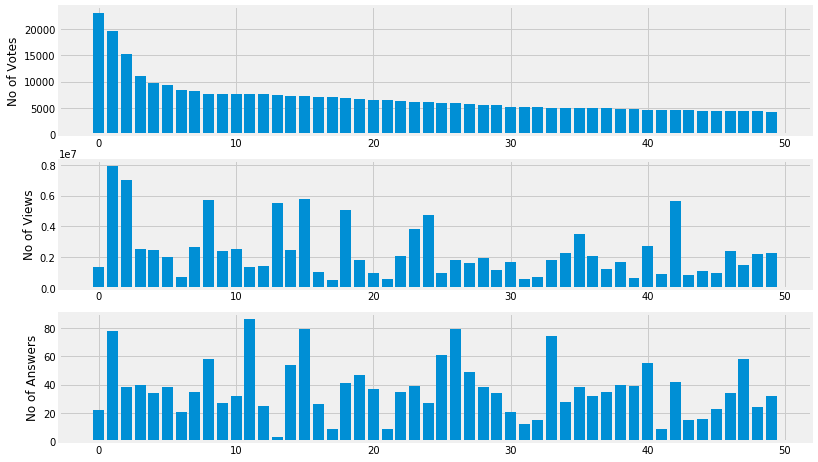

In [49]:
f, ax = plt.subplots(3, 1, figsize=(12, 8))

ax[0].bar(df1.index, df1.no_of_votes)
ax[0].set_ylabel('No of Votes')

ax[1].bar(df1.index, df1.no_of_views)
ax[1].set_ylabel('No of Views')

ax[2].bar(df1.index, df1.no_of_answers)
ax[2].set_ylabel('No of Answers')

plt.show()

Here, we may observe that there is no collinearity between the votes, views and answers related to a question. 

Useful Resources:
- [Dataquest Tutorial 1](https://www.dataquest.io/blog/web-scraping-tutorial-python/), [2](https://www.dataquest.io/blog/web-scraping-beautifulsoup/)
- [HackerNoon Tutorial](https://hackernoon.com/building-a-web-scraper-from-start-to-finish-bb6b95388184)
- [RealPython Tutorial](https://realpython.com/python-web-scraping-practical-introduction/)